<a href="https://colab.research.google.com/github/SteevAbrahamThomas/new-test/blob/main/Steev_Assesment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1:Load and Explore the Data

 2:Data Cleaning and Preprocessing

 3:Train-Test Split

 4:Build Machine Learning Models

 5:Evaluate Models on Test Data

 6:Summarize the classification and regression result in a table form and   declare the best performing model in each category based on the performance metric choosen.

 7:Create a custom Linear Regression class using which regression task can be carried out on multi-dimentional data (unlike the class room example where the number of features was 1). Write the mathematical derivation for the gradient equations (add as screenshot to notebook).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable

In [4]:
df = pd.read_csv('heart_disease.csv')

In [5]:
df.shape

(1025, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df.duplicated().sum()

np.int64(723)

In [11]:
df = df.drop_duplicates()

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


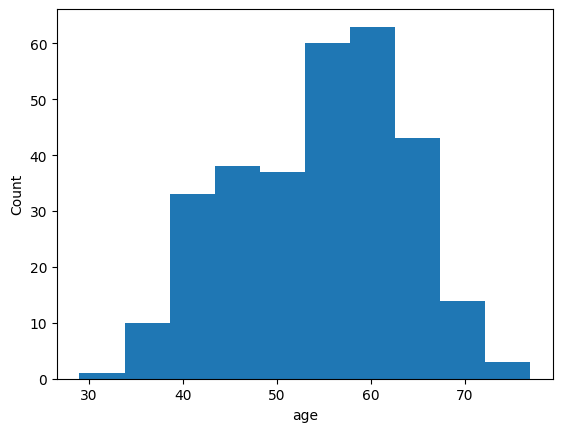

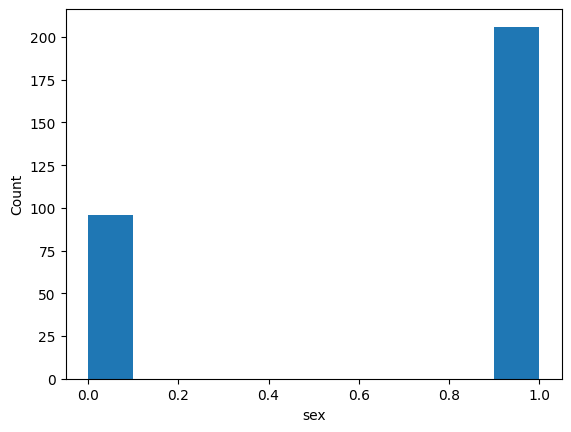

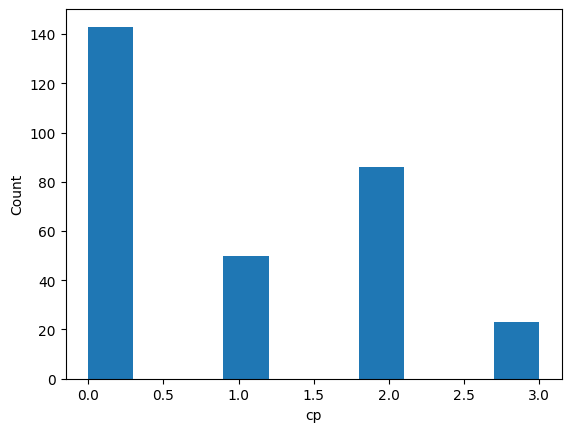

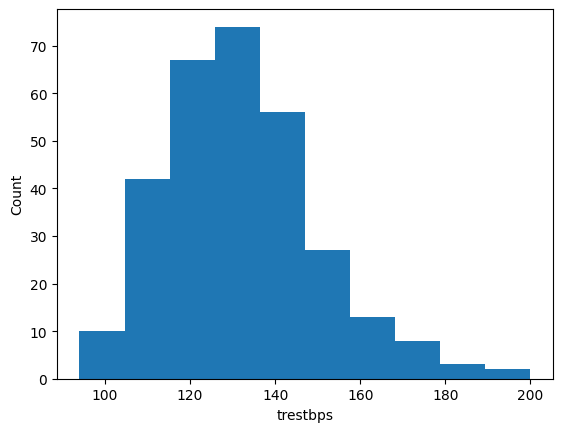

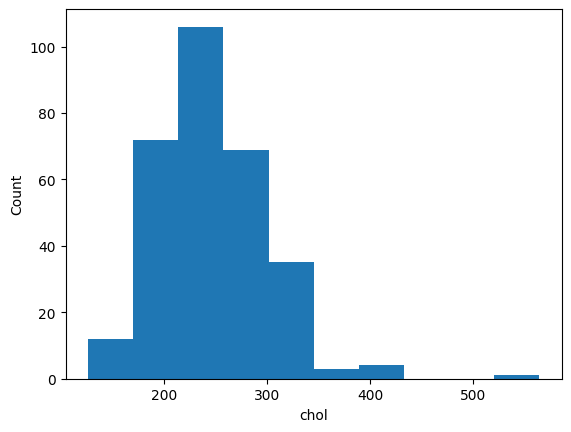

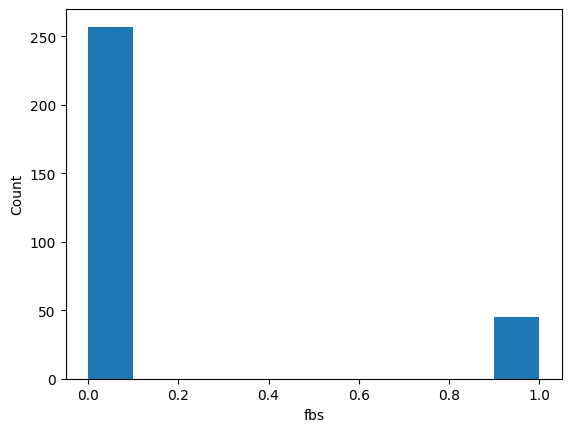

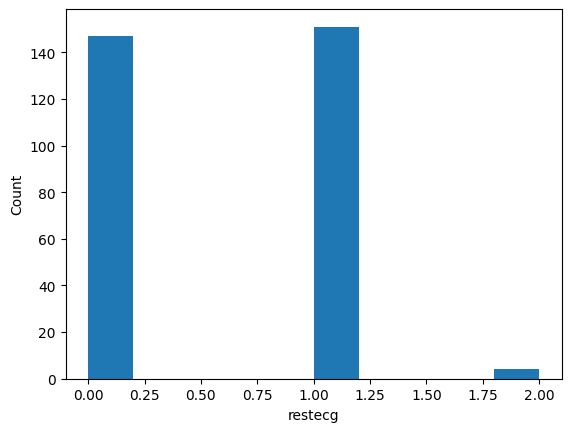

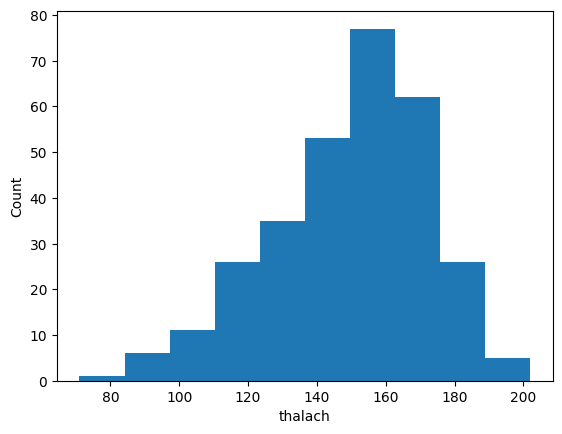

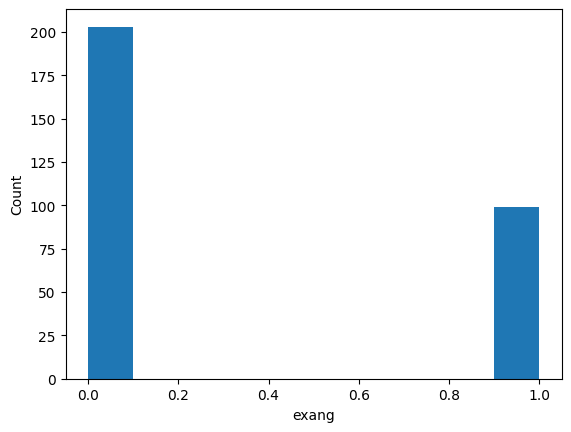

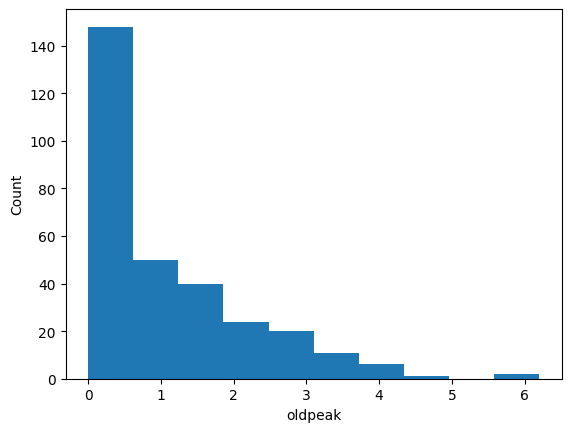

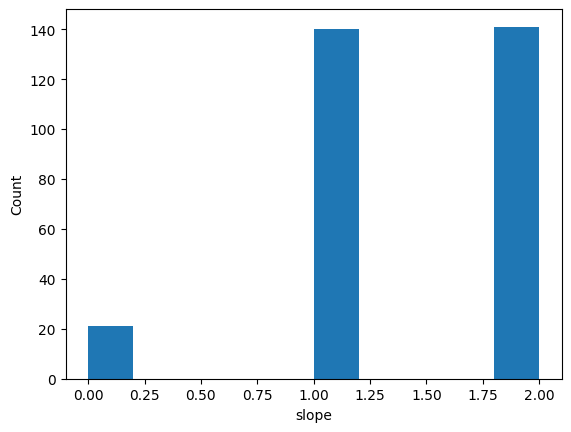

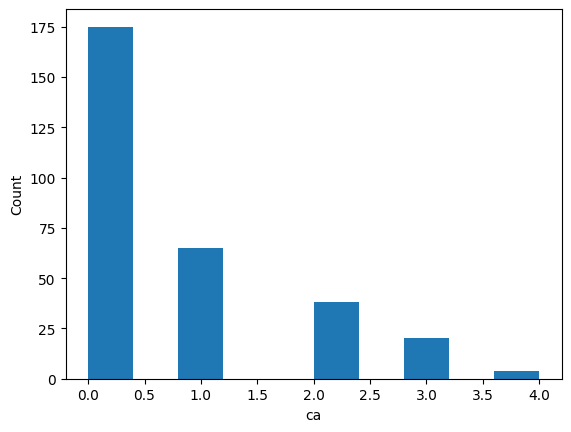

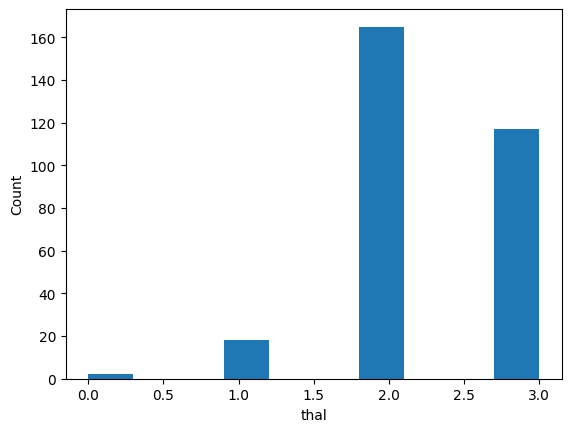

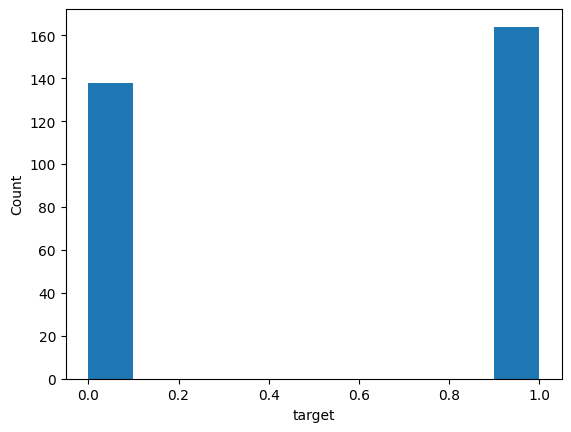

In [12]:
num_cols = df.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [13]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


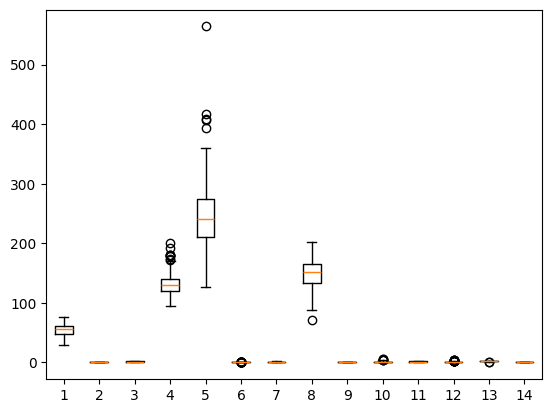

In [14]:
plt.boxplot(df)
plt.show()

In [15]:
def clip_outliers(df, column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  iqr = Q3 - Q1
  lower_bound = Q1 - 1.5 * iqr
  upper_bound = Q3 + 1.5 * iqr
  df[column_name] = df[column_name].clip(upper = upper_bound)
  df[column_name] = df[column_name].clip(lower = lower_bound)
  return df[column_name]

In [16]:
for col in num_cols:
  df[col] = clip_outliers(df, col)

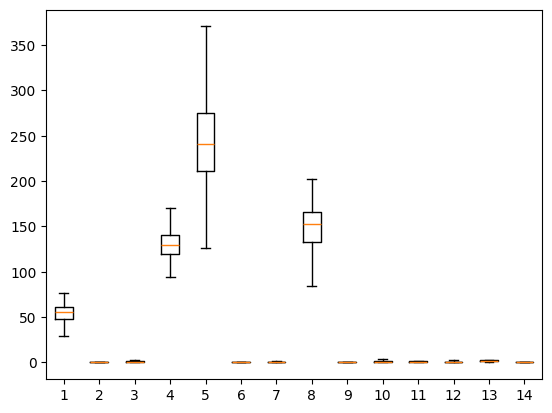

In [17]:
plt.boxplot(df)
plt.show()

In [18]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [19]:
scaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,ca_1.0,ca_2.0,ca_2.5,thal_1.0,thal_2.0,thal_3.0
0,-0.267966,-0.377511,-0.704039,0.808993,-0.025091,0,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,-0.157260,0.527318,-0.893880,0.237018,1.869266,0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,1.724733,0.828927,-1.505591,-1.082925,1.418229,0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0.728383,1.009893,-0.893880,0.501006,-0.927166,0,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
4,0.839089,0.406674,1.025627,-1.918889,0.786777,0,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.679121,-0.725132,-1.522906,0.425947,1,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
733,-1.153610,-1.402984,-2.201676,1.116980,-0.385921,1,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
739,-0.267966,-0.196546,0.202981,0.501006,-0.927166,0,True,False,False,False,...,False,True,False,True,True,False,False,False,False,True
843,0.506972,1.733756,0.582664,-1.082925,-0.927166,0,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [20]:
X_reg = df.drop('chol',axis=1)
y_reg = df['chol']

In [21]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [22]:
reg_table = PrettyTable()
reg_table.title = "Regression Task Summary (Target: chol)"
reg_table.field_names = ["Model", "MAE", "MSE", "R-squared (R²)"]

In [23]:
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)
y_pred_lr = lr.predict(X_reg_test)

In [24]:
mae_lr = mean_absolute_error(y_reg_test, y_pred_lr)
mse_lr = mean_squared_error(y_reg_test, y_pred_lr)
r2_lr = r2_score(y_reg_test, y_pred_lr)

reg_table.add_row([
    "Linear Regression",
    f"{mean_absolute_error(y_reg_test, y_pred_lr):.2f}",
    f"{mean_squared_error(y_reg_test, y_pred_lr):.2f}",
    f"{r2_score(y_reg_test, y_pred_lr):.2f}"
])

In [25]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_reg_train, y_reg_train)
y_pred_svm = svm_model.predict(X_reg_test)
mae_svm = mean_absolute_error(y_reg_test, y_pred_svm)
mse_svm = mean_squared_error(y_reg_test, y_pred_svm)
r2_svm = r2_score(y_reg_test, y_pred_svm)

In [26]:
reg_table.add_row([
    "Support Vector Regressor (SVR)",
    f"{mean_absolute_error(y_reg_test, y_pred_svm):.2f}",
    f"{mean_squared_error(y_reg_test, y_pred_svm):.2f}",
    f"{r2_score(y_reg_test, y_pred_svm):.2f}"
])

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_reg_train, y_reg_train)
y_pred_rf = rf_model.predict(X_reg_test)

mae_rf = mean_absolute_error(y_reg_test, y_pred_rf)
mse_rf = mean_squared_error(y_reg_test, y_pred_rf)
r2_rf = r2_score(y_reg_test, y_pred_rf)

In [28]:
reg_table.add_row([
    "Random Forest Regressor",
    f"{mean_absolute_error(y_reg_test, y_pred_rf):.2f}",
    f"{mean_squared_error(y_reg_test, y_pred_rf):.2f}",
    f"{r2_score(y_reg_test, y_pred_rf):.2f}"
])

In [29]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
cls_table = PrettyTable()
cls_table.title = "Classification Task Summary (Target: target)"
cls_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

In [31]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_lor = log_reg.predict(X_test)

In [32]:
cls_table.add_row([
    "Logistic Regression",
    f"{accuracy_score(y_test, y_pred_lor):.2f}",
    f"{precision_score(y_test, y_pred_lor):.2f}",
    f"{recall_score(y_test, y_pred_lor):.2f}",
    f"{f1_score(y_test, y_pred_lor):.2f}"
])

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [34]:
cls_table.add_row([
    "K-Nearest Neighbors (KNN)",
    f"{accuracy_score(y_test, y_pred_knn):.2f}",
    f"{precision_score(y_test, y_pred_knn):.2f}",
    f"{recall_score(y_test, y_pred_knn):.2f}",
    f"{f1_score(y_test, y_pred_knn):.2f}"
])

In [35]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_lor = log_reg.predict(X_test)

In [36]:
cls_table.add_row([
    "Logistic Regression",
    f"{accuracy_score(y_test, y_pred_lor):.2f}",
    f"{precision_score(y_test, y_pred_lor):.2f}",
    f"{recall_score(y_test, y_pred_lor):.2f}",
    f"{f1_score(y_test, y_pred_lor):.2f}"
])

In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [38]:
cls_table.add_row([
    "K-Nearest Neighbors (KNN)",
    f"{accuracy_score(y_test, y_pred_knn):.2f}",
    f"{precision_score(y_test, y_pred_knn):.2f}",
    f"{recall_score(y_test, y_pred_knn):.2f}",
    f"{f1_score(y_test, y_pred_knn):.2f}"
])

In [39]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [40]:
cls_table.add_row([
    "Random Forest Classifier",
    f"{accuracy_score(y_test, y_pred_rf):.2f}",
    f"{precision_score(y_test, y_pred_rf):.2f}",
    f"{recall_score(y_test, y_pred_rf):.2f}",
    f"{f1_score(y_test, y_pred_rf):.2f}"
])

In [41]:
print(reg_table)
print("\nBest Performing Regression Model: Support Vector Regressor (SVR)")

+---------------------------------------------------------------+
|             Regression Task Summary (Target: chol)            |
+--------------------------------+------+------+----------------+
|             Model              | MAE  | MSE  | R-squared (R²) |
+--------------------------------+------+------+----------------+
|       Linear Regression        | 0.73 | 0.87 |     -0.22      |
| Support Vector Regressor (SVR) | 0.66 | 0.73 |     -0.02      |
|    Random Forest Regressor     | 0.70 | 0.84 |     -0.18      |
+--------------------------------+------+------+----------------+

Best Performing Regression Model: Support Vector Regressor (SVR)


In [42]:
print(cls_table)
print("\nBest Performing Classification Model: Random Forest Classifier")

+----------------------------------------------------------------------+
|             Classification Task Summary (Target: target)             |
+---------------------------+----------+-----------+--------+----------+
|           Model           | Accuracy | Precision | Recall | F1-Score |
+---------------------------+----------+-----------+--------+----------+
|    Logistic Regression    |   0.80   |    0.77   |  0.83  |   0.80   |
| K-Nearest Neighbors (KNN) |   0.74   |    0.68   |  0.86  |   0.76   |
|    Logistic Regression    |   0.80   |    0.77   |  0.83  |   0.80   |
| K-Nearest Neighbors (KNN) |   0.74   |    0.68   |  0.86  |   0.76   |
|  Random Forest Classifier |   0.82   |    0.76   |  0.90  |   0.83   |
+---------------------------+----------+-----------+--------+----------+

Best Performing Classification Model: Random Forest Classifier


In [43]:
class CustomLinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [46]:
X = df.drop('chol', axis=1).astype(float)
y = df['chol']
X_np = X.to_numpy()
y_np = y.to_numpy()
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

custom_regressor = CustomLinearRegression(lr=0.01, n_iters=1500)
custom_regressor.fit(X_reg_train, y_reg_train)
predictions = custom_regressor.predict(X_reg_test)
mse = mean_squared_error(y_reg_test, predictions)
r2 = r2_score(y_reg_test, predictions)
print(f"Custom Model Mean Squared Error (MSE): {mse:.2f}")
print(f"Custom Model R-squared (R²): {r2:.2f}\n")

Custom Model Mean Squared Error (MSE): 0.79
Custom Model R-squared (R²): -0.12

